In [1]:
import pyroomacoustics as pra
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
source_location = [20,40,60]

mic_location = []

for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            mic_location.append([i,j,k])
mic_location = np.array(mic_location)

mic_location

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 2],
       [0, 1, 0],
       [0, 1, 1],
       [0, 1, 2],
       [0, 2, 0],
       [0, 2, 1],
       [0, 2, 2],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 2],
       [1, 2, 0],
       [1, 2, 1],
       [1, 2, 2],
       [2, 0, 0],
       [2, 0, 1],
       [2, 0, 2],
       [2, 1, 0],
       [2, 1, 1],
       [2, 1, 2],
       [2, 2, 0],
       [2, 2, 1],
       [2, 2, 2]])

In [3]:
fs, audio_data = wavfile.read('from/teams/channel/irFDN.wav')

fs

48000

In [4]:
room_dim = np.r_[100,100]

aroom = pra.ShoeBox(room_dim, fs = fs, max_order=0)
aroom.extrude(100)

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

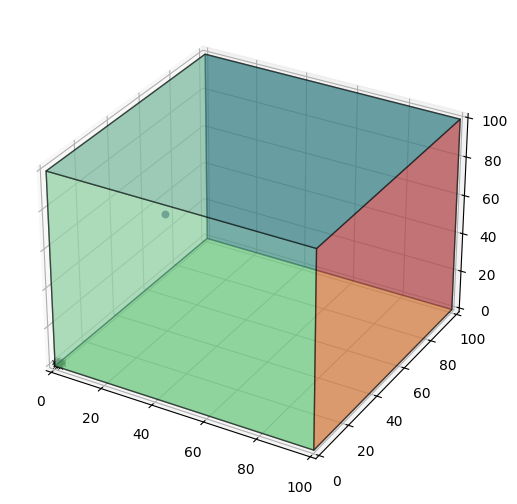

In [5]:
aroom.add_source(source_location, audio_data)
aroom.add_microphone_array(mic_location.T)

aroom.plot()

In [6]:
aroom.simulate()

In [7]:
X = aroom.mic_array.signals

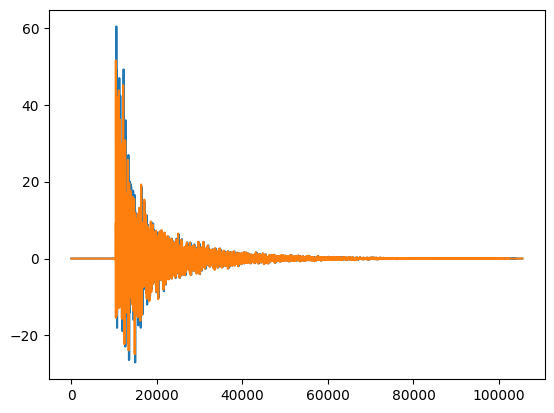

In [8]:
plt.plot(X[0,:])
plt.plot(X[1,:])

In [9]:
def find_shift(x,x_shifted): # return shift t
    N = len(x)
    max_correlation = -np.inf
    optimal_shift = 0
    
    for t in range(N):
        current_correlation = 0
        for n in range(N-t):
            current_correlation += x[n]*x_shifted[n+t]
        
        if current_correlation > max_correlation:
            max_correlation = current_correlation
            optimal_shift = t
    return optimal_shift

In [10]:
tdoa_measured = {}
for i in range(len(mic_location)):
    for j in range(i,len(mic_location)):
        print(i,j)
        cross_corr = np.correlate(aroom.mic_array.signals[i,:],aroom.mic_array.signals[j,:], mode='full')

        # Find the time shift
        time_shift = np.argmax(cross_corr) - (len(aroom.mic_array.signals[i,:]) - 1)
        time_shift /= fs  # Convert to seconds

        tdoa_measured[(i,j)] =  time_shift
tdoa_measured

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25


KeyboardInterrupt: 

In [11]:
def distance(x,y):
    return np.sqrt((x-y)@(x-y))

In [12]:


def distance(x,y):
    return np.sqrt((x - y)@(x - y))

def scalar_cost_function(s, mic_positions, tdoa_dict, c):
    num_mics = mic_positions.shape[0]
    cost = 0
    for i in range(num_mics):
        for j in range(i+1, num_mics):
            try:
                expected_tdoa = (distance(mic_positions[i], s) - distance(mic_positions[j], s)) / c
                cost += (expected_tdoa - tdoa_dict[(i, j)]) ** 2
            except:
                pass
    return cost




# Initial guess (required for least squares method)
initial_guess = np.array([10, 26, 10]) 


# Initial guess

from scipy.optimize import minimize
result = minimize(scalar_cost_function, initial_guess, args=(mic_location, tdoa_measured, aroom.c),method='Nelder-Mead')


# Perform optimization to find the source location
#result = least_squares(cost_function, initial_guess, args=(microphone_positions, tdoa_measured, aroom.c))

# Extract optimized source location
x,y,z = result.x
print(result.x)


[18.84682481 37.64333518 56.47180176]
